<a href="https://colab.research.google.com/github/Kamran0153/Autoregressive-Model-Exp/blob/main/AR(p)InferenceError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

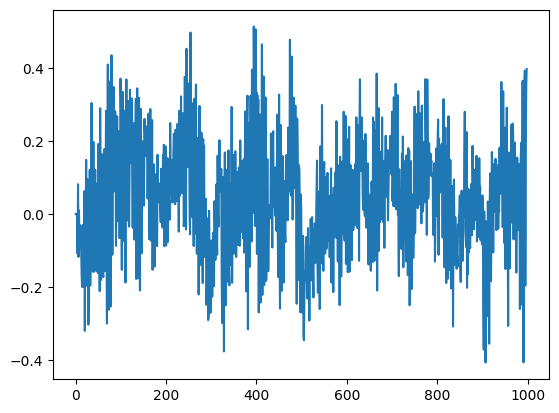

In [4]:
from pandas._libs.tslibs.nattype import NaT
import numpy as np
from scipy.special import jv
#x_t=a_1 x_{t-1}+ a_p x_{t-p}+w
#y_t=x_t+N
# We need to predict y_t by using x_{t-\delta}
sample=1000000
x=np.zeros(sample)
y=np.zeros(sample)
p=4
a=np.zeros(p)
a[0]=0.1 #AR-coefficient a_1
a[p-1]=0.8 #AR-coefficient a_p
w=0.01 #noise variance
N=0.001 # noise variance

for i in range(p):
  x[i]=0
  y[i]=x[0]+np.random.normal(0, np.sqrt(N))
for i in range(p,sample):
  x[i]=a[0]*x[i-1]+a[p-1]*x[i-p]+np.random.normal(0, np.sqrt(w))
  y[i]=x[i]+np.random.normal(0, np.sqrt(N))
import matplotlib.pyplot as plt
plt.plot(x[1:1000])


# Autocorrelation Coefficient

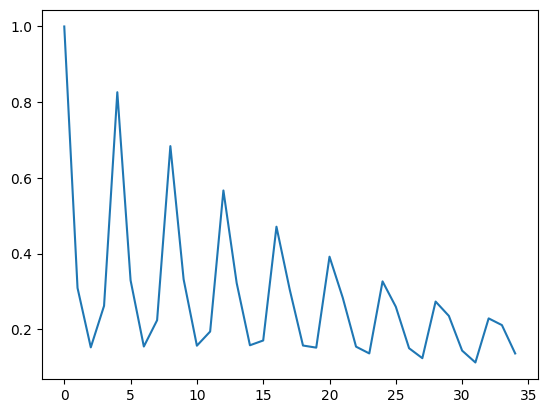

In [9]:
import pandas as pd
s = pd.Series(x)
rho=[]
age=[]
for k in range(0,35):
   rho.append(s.autocorr(lag=k))
   age.append(k)
plt.plot(age, rho)

# MMSE

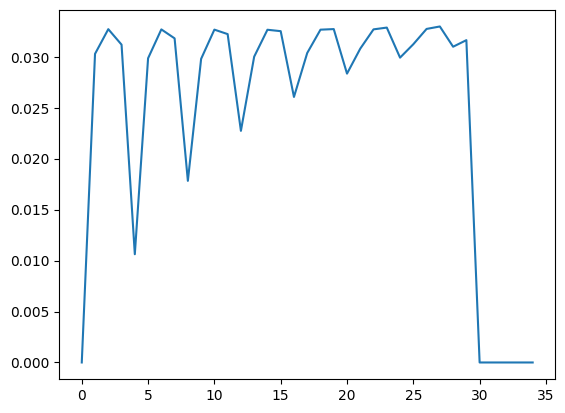

In [11]:
error=np.zeros(len(age))
for k in range(30):
  error[k]=(1-rho[k]**2)*np.var(y)
plt.plot(age,error)

In [12]:
error

array([7.43397337e-18, 3.02823564e-02, 3.27048654e-02, 3.11853846e-02,
       1.06209169e-02, 2.98488301e-02, 3.26823003e-02, 3.18028996e-02,
       1.78216832e-02, 2.97928456e-02, 3.26596370e-02, 3.22203412e-02,
       2.27291106e-02, 3.00053613e-02, 3.26476712e-02, 3.25088442e-02,
       2.60549529e-02, 3.03675403e-02, 3.26550017e-02, 3.27124765e-02,
       2.83429288e-02, 3.07960863e-02, 3.26858862e-02, 3.28599464e-02,
       2.99114617e-02, 3.12275140e-02, 3.27284496e-02, 3.29689780e-02,
       3.09819847e-02, 3.16272564e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])